# Nobel Prize Analysis

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Data Exploration & Cleaning

In [4]:
data = pd.read_csv('nobel_prize_data.csv')

In [5]:
data.sample(5)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
486,1978,Medicine,The Nobel Prize in Physiology or Medicine 1978,"""for the discovery of restriction enzymes and ...",1/3,Individual,Daniel Nathans,1928-10-30,"Wilmington, DE",United States of America,United States of America,Male,Johns Hopkins University,"Baltimore, MD",United States of America,USA
146,1929,Literature,The Nobel Prize in Literature 1929,"""principally for his great novel, <I>Buddenbro...",1/1,Individual,Thomas Mann,1875-06-06,Lübeck,Germany,Germany,Male,NaN,NaN,NaN,DEU
861,2012,Physics,The Nobel Prize in Physics 2012,"""for ground-breaking experimental methods that...",1/2,Individual,David J. Wineland,1944-02-24,"Milwaukee, WI",United States of America,United States of America,Male,National Institute of Standards and Technology,"Boulder, CO",United States of America,USA
416,1972,Chemistry,The Nobel Prize in Chemistry 1972,"""for his work on ribonuclease, especially conc...",1/2,Individual,Christian B. Anfinsen,1916-03-26,"Monessen, PA",United States of America,United States of America,Male,National Institutes of Health,"Bethesda, MD",United States of America,USA
82,1915,Chemistry,The Nobel Prize in Chemistry 1915,"""for his researches on plant pigments, especia...",1/1,Individual,Richard Martin Willstätter,1872-08-13,Karlsruhe,Germany,Germany,Male,Munich University,Munich,Germany,DEU


In [6]:
data.shape

(962, 16)

In [7]:
data[data.isna().any(axis=1)]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE
7,1902,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1/1,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Germany,Male,NaN,NaN,NaN,DEU
9,1902,Peace,The Nobel Peace Prize 1902,NaN,1/2,Individual,Charles Albert Gobat,1843-05-21,Tramelan,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,2019,Literature,The Nobel Prize in Literature 2019,“for an influential work that with linguistic ...,1/1,Individual,Peter Handke,1942-12-06,Griffen,Austria,Austria,Male,NaN,NaN,NaN,AUT
946,2019,Peace,The Nobel Peace Prize 2019,“for his efforts to achieve peace and internat...,1/1,Individual,Abiy Ahmed Ali,1976-08-15,Beshasha,Ethiopia,Ethiopia,Male,NaN,NaN,NaN,ETH
954,2020,Literature,The Nobel Prize in Literature 2020,“for her unmistakable poetic voice that with a...,1/1,Individual,Louise Glück,1943-04-22,"New York, NY",United States of America,United States of America,Female,NaN,NaN,NaN,USA
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR


In [8]:
data.duplicated(['full_name'], keep=False).value_counts()

False    949
True      13
Name: count, dtype: int64

In [9]:
data.loc[data.duplicated(['full_name'], keep=False)].sort_values('full_name')

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,Individual,Frederick Sanger,1918-08-13,Rendcombe,United Kingdom,United Kingdom,Male,University of Cambridge,Cambridge,United Kingdom,GBR
505,1980,Chemistry,The Nobel Prize in Chemistry 1980,"""for their contributions concerning the determ...",1/4,Individual,Frederick Sanger,1918-08-13,Rendcombe,United Kingdom,United Kingdom,Male,MRC Laboratory of Molecular Biology,Cambridge,United Kingdom,GBR
297,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,Individual,John Bardeen,1908-05-23,"Madison, WI",United States of America,United States of America,Male,University of Illinois,"Urbana, IL",United States of America,USA
424,1972,Physics,The Nobel Prize in Physics 1972,"""for their jointly developed theory of superco...",1/3,Individual,John Bardeen,1908-05-23,"Madison, WI",United States of America,United States of America,Male,University of Illinois,"Urbana, IL",United States of America,USA
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,USA
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,USA
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL


In [10]:
data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

In [11]:
data.sample()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
142,1928,Medicine,The Nobel Prize in Physiology or Medicine 1928,"""for his work on typhus""",1/1,Individual,Charles Jules Henri Nicolle,1866-09-21,Rouen,France,France,Male,Institut Pasteur,Tunis,Tunisia,FRA


In [12]:
data.dtypes

year                      int64
category                 object
prize                    object
motivation               object
prize_share              object
laureate_type            object
full_name                object
birth_date               object
birth_city               object
birth_country            object
birth_country_current    object
sex                      object
organization_name        object
organization_city        object
organization_country     object
ISO                      object
dtype: object

In [13]:
data.year.min()

1901

In [14]:
data.year.max()

2020

In [16]:
data.birth_date = pd.to_datetime(data.birth_date, format="%Y-%m-%d")

In [22]:
data.dtypes

year                              int64
category                         object
prize                            object
motivation                       object
prize_share                      object
laureate_type                    object
full_name                        object
birth_date               datetime64[ns]
birth_city                       object
birth_country                    object
birth_country_current            object
sex                              object
organization_name                object
organization_city                object
organization_country             object
ISO                              object
dtype: object

In [593]:
sep_values = data.prize_share.str.split('/', expand=True)
numerator = pd.to_numeric(sep_values[0])
denominator = pd.to_numeric(sep_values[1])
data['share_pct']= numerator/denominator

In [599]:
data.sample()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
648,1994,Physics,The Nobel Prize in Physics 1994,"""for pioneering contributions to the developme...",1/2,Individual,Bertram N. Brockhouse,1918-07-15,"Lethbridge, Alberta",Canada,Canada,Male,McMaster University,"Hamilton, Ontario",Canada,CAN,0.5


- There are no duplicates as such when searching by full name, as some person or organisations won prizes in more than one year, which is why they show up when searching for duplicates using this field.
- There are some missing/NaN values in fields such as birth date, but this is due to the prize being won by an organisation, therefore there will be no birth date listed. In the organisation name column, when there are no values, this indicates that the prize went to a person who was not affiliated with a university or research institute e.g. Literature or Peace prize winners

## Exploratory questions
1. How many of each prize was awarded?
2. How many prizes were split?
3. What is the most common prize? What is the least common prize?
4. What is the split of all prizes awarded females vs males?
5. What were the names of the first 3 female Nobel laureates?
6. What did the first 3 female laureates win prizes for?
7. What were the names of the first 3 male Nobel laureates?
8. What did the first 3 male laureates win prizes for?
9. How many people won prizes more than once?
10. How many organisations won prizes more than once?
11. In how many categories are prizes awarded?
12. Which category has the most number of prizes awarded?
13. Which category has the fewest number of prizes awarded?
14. What is the distribution of prizes awarded to individuals by country?
15. What is the split of prizes between organisations and individuals?
16. Are more prizes awarded recently than when the prize was first created?
17. Are more prizes shared now than before?

In [142]:
data.shape

(962, 17)

In [102]:
data.groupby('category').prize.count()

category
Chemistry     186
Economics      86
Literature    117
Medicine      222
Peace         135
Physics       216
Name: prize, dtype: int64

In [112]:
categories = data.groupby('category').prize.count()

Text(0.5, 1.0, 'Prizes by Category')

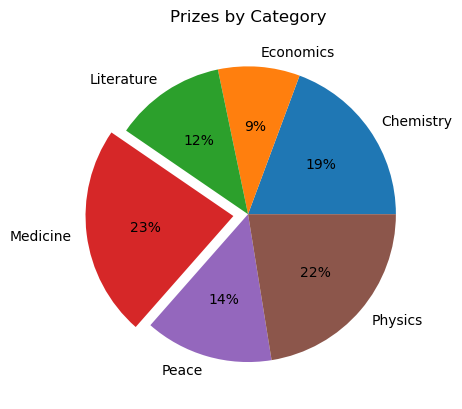

In [136]:
plt.figure()
plt.pie(categories, labels=categories.index, autopct="%1.0f%%", explode=(0,0,0,0.1,0,0))
plt.title('Prizes by Category')

In [158]:
data.sample()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Germany,Male,Munich University,Munich,Germany,DEU,0.5


In [166]:
data.query('share_pct != 1').share_pct.count()

962

1.
- There were a total of 962 prizes awarded
- The prizes are split between 6 categories: Chemistry, Economics, Literature, Medicine, Peace, Physics

The number of prizes awarded are as follows:
- Chemistry     186
- Economics      86
- Literature    117
- Medicine      222
- Peace         135
- Physics       216

2. There are 962 prizes that were split between 2 or more individuals

3.
- 'Medicine' is the category with the most amount prizes awarded (222 prizes, representing 23% of all prizes awarded)
- 'Economics' is the category with the least amount of prizes awarded (86 prizes, representing 9% of all prizes awarded)

In [169]:
data.sample()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
938,2019,Chemistry,The Nobel Prize in Chemistry 2019,“for the development of lithium-ion batteries”,1/3,Individual,M. Stanley Whittingham,1941-12-22,Nottingham,United Kingdom,United Kingdom,Male,Binghamton University State University of New ...,"New York, NY",United States of America,GBR,0.5


In [183]:
data.groupby('sex').sex.count()

sex
Female     58
Male      876
Name: sex, dtype: int64

In [185]:
sex = data.groupby('sex').sex.count()

Text(0.5, 1.0, 'Prizes by Sex')

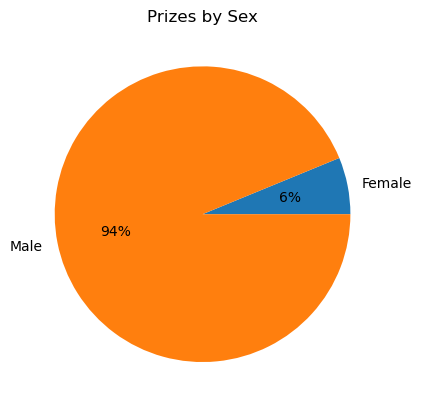

In [187]:
plt.figure()
plt.pie(sex, labels=sex.index, autopct="%1.0f%%")
plt.title('Prizes by Sex')

4. 
- Out of 962 prizes, 934 prizes were awarded to individuals, 28 prizes were awarded to organisations
- There was a total of 58 prizes awarded to females
- There was a total of 876 prizes awarded to males
- Out of the prizes awarded to individuals, Females were awarded 6% and Males were awarded 94%

In [261]:
data_mf = data.groupby(['category','sex'], as_index=False).agg({'prize':pd.Series.count}).sort_values('prize', ascending=False)

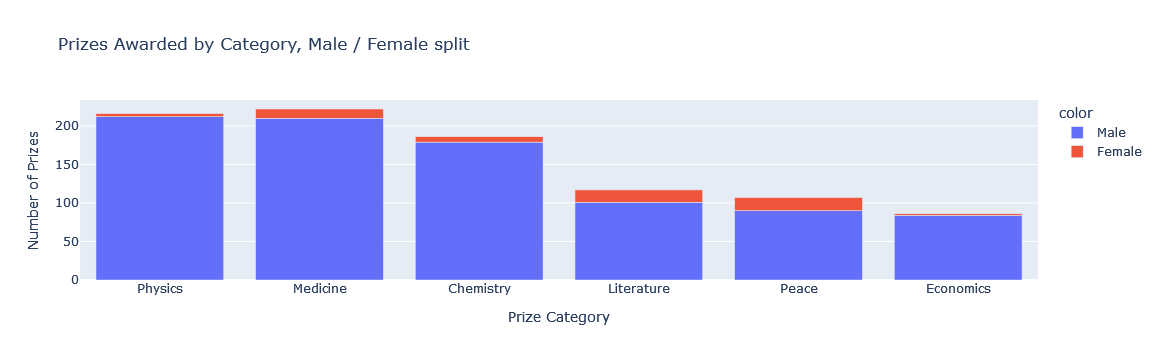

In [267]:
bar = px.bar(
    x = data_mf.category,
    y = data_mf.prize,
    color = data_mf.sex,
    title = 'Prizes Awarded by Category, Male / Female split'
)
bar.update_layout(
    xaxis_title='Prize Category',
    yaxis_title='Number of Prizes'
)

- Females are better represented in the 'Medicine', 'Literature' and 'Peace' categories

In [199]:
data[data.sex == 'Female'].sort_values('year').head(3)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.5
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,0.5
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,0.5


5.

The first 3 female Nobel laureates were:
- Marie Curie, née Sklodowska in 1903
- Baroness Bertha Sophie Felicita von Suttner in 1905
- Selma Ottilia Lovisa Lagerlöf in 1909

6. 

The first 3 female Nobel laureates were awarded prizes for:
- Physics
- Peace
- Literature

In [208]:
data[data.sex == 'Male'].sort_values('year').head(3)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,0.5
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,0.5
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,0.5


7.

The first 3 male Nobel laureates were:

- Jacobus Henricus van 't Hof in 1901
- Sully Prudhomme in 1901
- Emil Adolf von Behring in 1901




8.

The first 3 male Nobel laureates were awarded prizes for:
- Chemistry
- Literature
- Medicine




In [225]:
multiple_wins = data[data.duplicated('full_name', keep=False)]

In [235]:
multiple_wins[multiple_wins.laureate_type == 'Individual'].full_name.unique()

array(['Marie Curie, née Sklodowska', 'Linus Carl Pauling',
       'John Bardeen', 'Frederick Sanger'], dtype=object)

9.

There were 4 individuals who won a prize more than once:
- Marie Curie, née Sklodowska
- Linus Carl Pauling
- John Bardeen
- Frederick Sanger

In [244]:
data[data.duplicated('organization_name', keep=False)]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,0.5
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,0.5
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,0.5
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,0.5
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Germany,Male,Munich University,Munich,Germany,DEU,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Harvey J. Alter,1935-09-12,"New York, NY",United States of America,United States of America,Male,National Institutes of Health,"Bethesda, MD",United States of America,USA,0.5
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,Organization,World Food Programme (WFP),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5
959,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA,0.5
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU,0.5


In [240]:
multiple_wins_org = data[data.duplicated('organization_name', keep=False)]

In [248]:
multiple_wins_org.organization_name.nunique()

100

10.
- There are 100 organisations who won more than one prize

In [282]:
categories = data.groupby('category').category.count()

In [284]:
categories

category
Chemistry     186
Economics      86
Literature    117
Medicine      222
Peace         135
Physics       216
Name: category, dtype: int64

<BarContainer object of 6 artists>

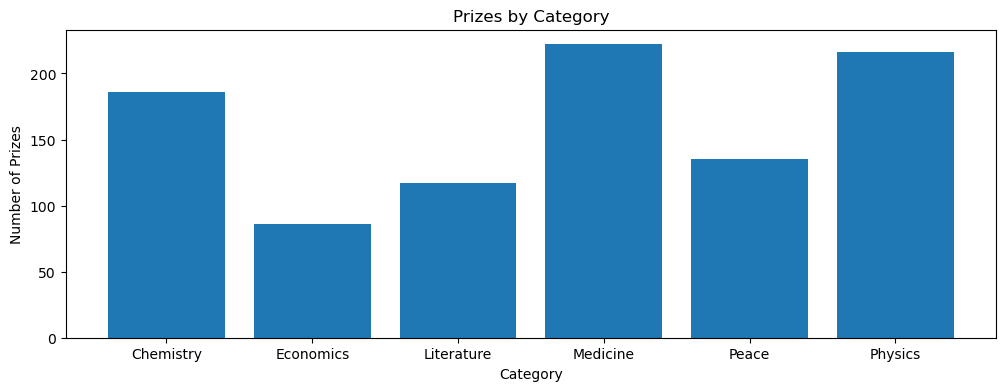

In [322]:
plt.figure(figsize=(12,4))
plt.title('Prizes by Category')
plt.xlabel('Category')
plt.ylabel('Number of Prizes')
plt.bar(categories.index, height=categories)

11. 
- Prizes are awarded across 6 categories


12.
- 'Medicine' is the category with the most number of prizes awarded

13.
- Economics is the category with the least number of prizes awarded

In [354]:
individuals = data[data.laureate_type == 'Individual']

In [358]:
individuals.sample()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
810,2008,Medicine,The Nobel Prize in Physiology or Medicine 2008,"""for his discovery of human papilloma viruses ...",1/2,Individual,Harald zur Hausen,1936-03-11,Gelsenkirchen,Germany,Germany,Male,German Cancer Research Center,Heidelberg,Germany,DEU,0.5


In [386]:
individuals_countries.sort_values(ascending=False)

birth_country
United States of America    281
United Kingdom               91
Germany                      65
France                       54
Sweden                       29
                           ... 
Mecklenburg (Germany)         1
Madagascar                    1
Lithuania                     1
Kenya                         1
Yemen                         1
Name: birth_country, Length: 120, dtype: int64

Text(0, 0.5, 'Number of Prizes')

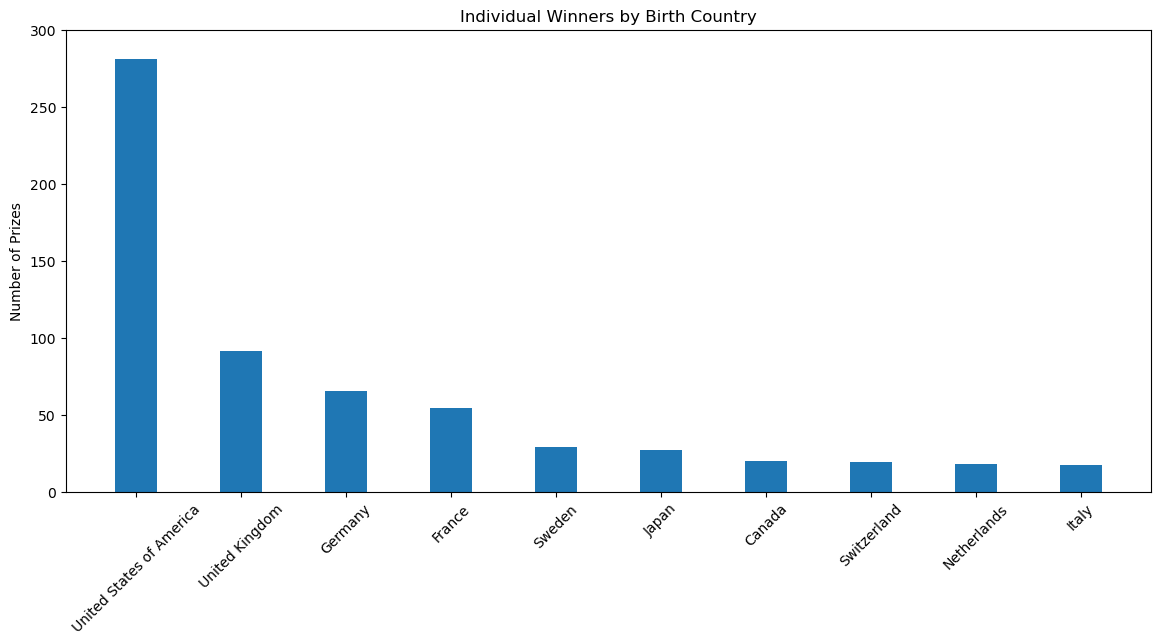

In [438]:
plt.figure(figsize=(14,6))
plt.title('Individual Winners by Birth Country')
plt.bar(individuals_countries.index[:10], 
        height = individuals_countries[:10],
        width = 0.4
       )
plt.xticks(rotation=45)
plt.ylim(0,300)
plt.ylabel('Number of Prizes')

14. 

Country distribution by Individual winners:
- In terms of distribution of prizes by individual winners, the USA has the most award winners with 281 winners
- Followed by the United Kingdom with 91 winners and then Germany with 65 winners.

In [331]:
data.groupby('laureate_type').laureate_type.count()

laureate_type
Individual      930
Organization     32
Name: laureate_type, dtype: int64

([<matplotlib.patches.Wedge at 0x201da661520>,
 [Text(-1.0939990890874298, 0.11474316134686953, 'Individual'),
  Text(1.292908011201976, -0.13560558458172417, 'Organization')],
 [Text(-0.5967267758658708, 0.06258717891647428, '97%'),
  Text(0.7956356992012159, -0.08344959051183025, '3%')])

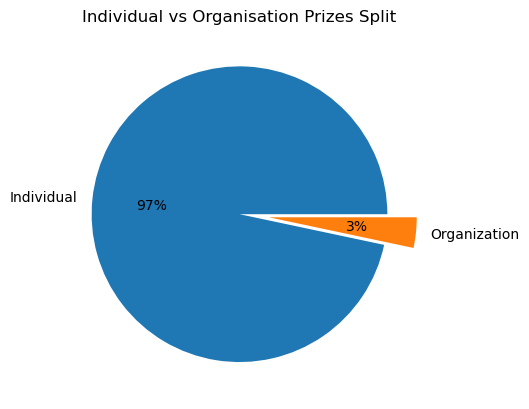

In [349]:
laureate_split = data.groupby('laureate_type').laureate_type.count()
plt.figure()
plt.title('Individual vs Organisation Prizes Split')
plt.pie(laureate_split, 
        labels=laureate_split.index,
        autopct="%1.0f%%",
        explode=(0,0.2)
       )

15.
- There were 930 prizes awarded to individuals vs 32 awarded to organisations
- This means that 97% of prizes were awarded to individuals vs 3% to organisations

In [545]:
prizesbyyear = data.groupby('year').count().prize

In [551]:
moving_average = prizesbyyear.rolling(window=5).mean()

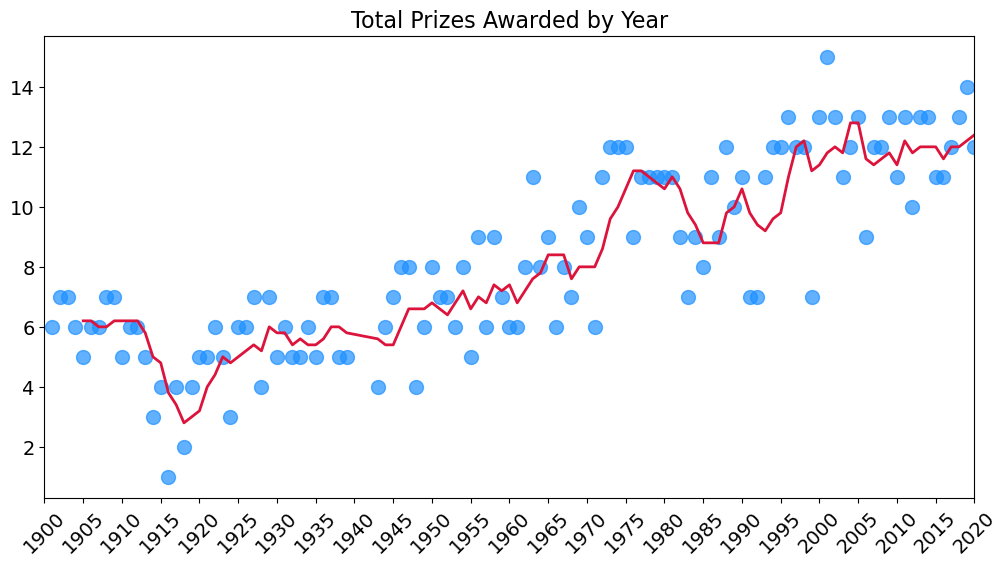

In [569]:
plt.figure(figsize=(12,6))
plt.title('Total Prizes Awarded by Year', fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, 
           rotation=45,
           ticks=np.arange(1900,2021,step=5)       
          )

ax = plt.gca()
ax.set_xlim(1900,2020)

ax.scatter(
    x=prizesbyyear.index,
    y=prizesbyyear.values,
    c='dodgerblue',
    alpha=0.7,
    s=100
)

ax.plot(prizesbyyear.index, 
        moving_average.values,
        color='crimson',
        lw=2
       )

In [601]:
yearly_avg_share = data.groupby(by='year').agg({'share_pct':pd.Series.mean})

In [603]:
yearly_avg_share_ma = yearly_avg_share.rolling(window=5).mean()

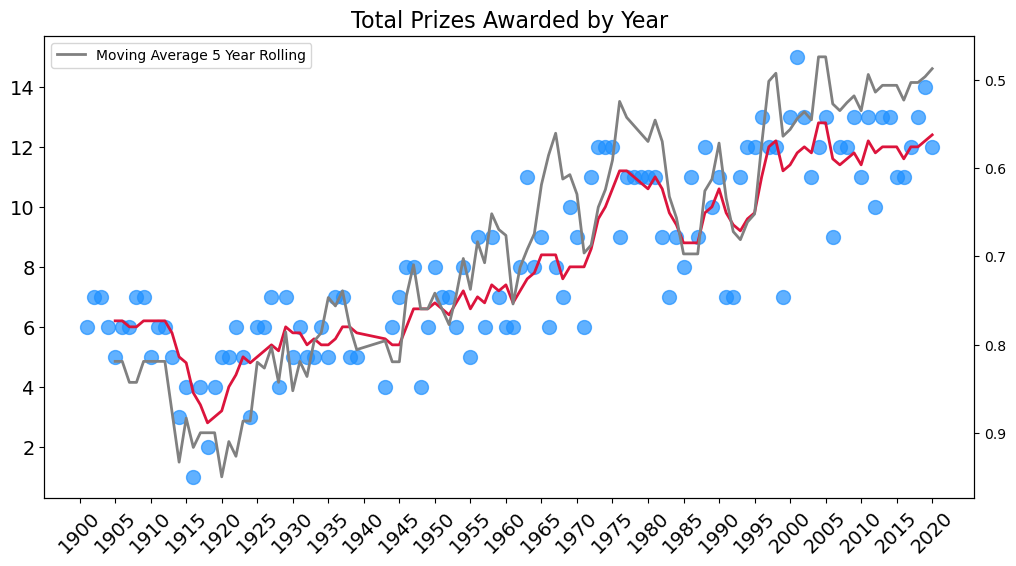

In [617]:
plt.figure(figsize=(12,6))
plt.title('Total Prizes Awarded by Year', fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, 
           rotation=45,
           ticks=np.arange(1900,2021,step=5)       
          )

ax1 = plt.gca()
ax2 = ax1.twinx()
ax.set_xlim(1900,2020)
ax2.invert_yaxis()

ax1.scatter(
    x=prizesbyyear.index,
    y=prizesbyyear.values,
    c='dodgerblue',
    alpha=0.7,
    s=100,
    label='Prizes by Year'
)

ax1.plot(prizesbyyear.index, 
        moving_average.values,
        color='crimson',
        lw=2,
        label='Moving Average'
       )
ax2.plot(prizesbyyear.index,
         yearly_avg_share_ma.values,
         color='grey',
         lw=2,
         label='Moving Average 5 Year Rolling'
        )
plt.legend()

- There is an upward trend in the number of prizes given out, as well as the number of shared prizes.
- There is also an increase in the number of prizes given out after the year 1969 - the year the 'Economics' category was added
- There are less prizes given out during the period of the first and second world war, as indicated by fewer 'dots' around these periods

## Data Visualisation

In [621]:
data.sample()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
371,1966,Literature,The Nobel Prize in Literature 1966,"""for her outstanding lyrical and dramatic writ...",1/2,Individual,Nelly Sachs,1891-12-10,Berlin,Germany,Germany,Female,NaN,NaN,NaN,DEU,0.5


In [638]:
top_countries = data.groupby(['birth_country_current'], as_index=False).agg({'prize':pd.Series.count})
top_countries.sort_values(by='prize', inplace=True)
top20_countries = top_countries[-20:]

In [642]:
top20_countries.head()

,birth_country_current,prize
7,Belgium,9
31,Hungary,9
33,India,9
2,Australia,10
20,Denmark,12


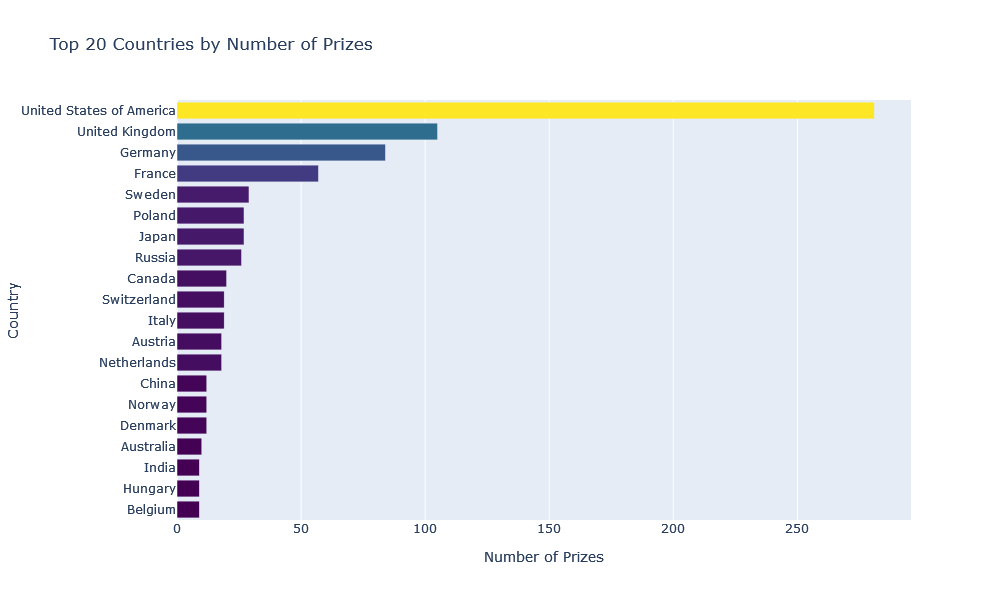

In [652]:
h_bar = px.bar(
    x=top20_countries.prize,
    y=top20_countries.birth_country_current,
    orientation='h',
    color=top20_countries.prize,
    color_continuous_scale='Viridis',
    title='Top 20 Countries by Number of Prizes',
    height=600,
    width=1000
)
h_bar.update_layout(
    xaxis_title='Number of Prizes',
    yaxis_title='Country',
    coloraxis_showscale=False
)

In [654]:
countries = data.groupby(['birth_country_current', 'ISO'], as_index=False).agg({'prize':pd.Series.count})
countries.sort_values('prize', ascending=False)

,birth_country_current,ISO,prize
74,United States of America,USA,281
73,United Kingdom,GBR,105
26,Germany,DEU,84
25,France,FRA,57
67,Sweden,SWE,29
...,...,...,...
32,Iceland,ISL,1
47,Madagascar,MDG,1
34,Indonesia,IDN,1
36,Iraq,IRQ,1


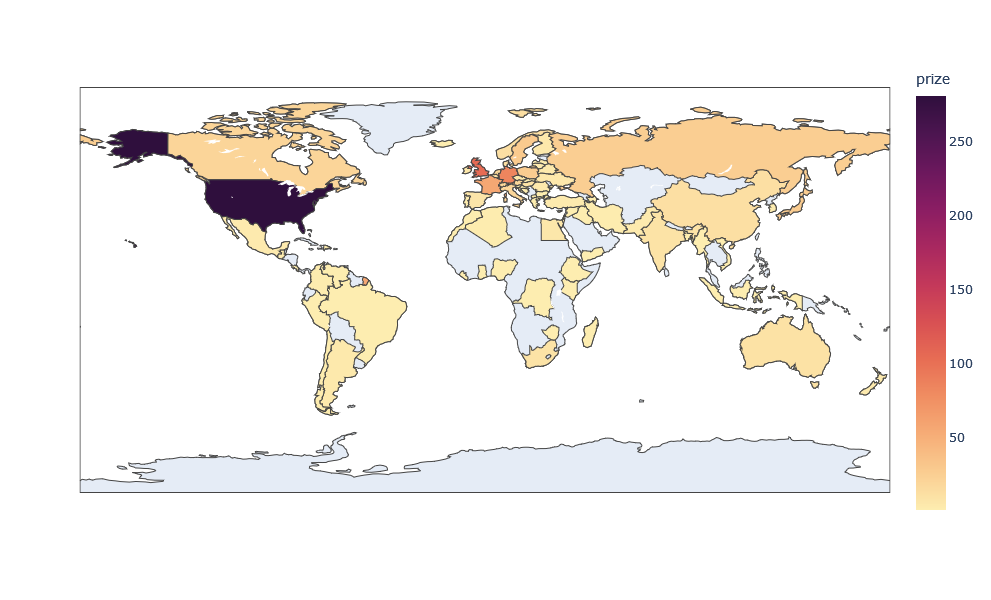

In [664]:
wm = px.choropleth(
    countries,
    locations='ISO',
    color='prize',
    hover_name='birth_country_current',
    color_continuous_scale = px.colors.sequential.matter,
    height=600,
    width=800
)
wm.update_layout(coloraxis_showscale=True)

In [666]:
data.sample()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
126,1925,Physics,The Nobel Prize in Physics 1925,"""for their discovery of the laws governing the...",1/2,Individual,James Franck,1882-08-26,Hamburg,Germany,Germany,Male,Goettingen University,Göttingen,Germany,DEU,0.5


In [668]:
prize_by_year = data.groupby(['birth_country_current', 'year'], as_index=False).count()
prize_by_year = prize_by_year.sort_values('year')[['year', 'birth_country_current', 'prize']]

In [672]:
cumulative_prizes = prize_by_year.groupby(['birth_country_current', 'year']).sum().groupby(level=[0]).cumsum()
cumulative_prizes.reset_index(inplace=True)

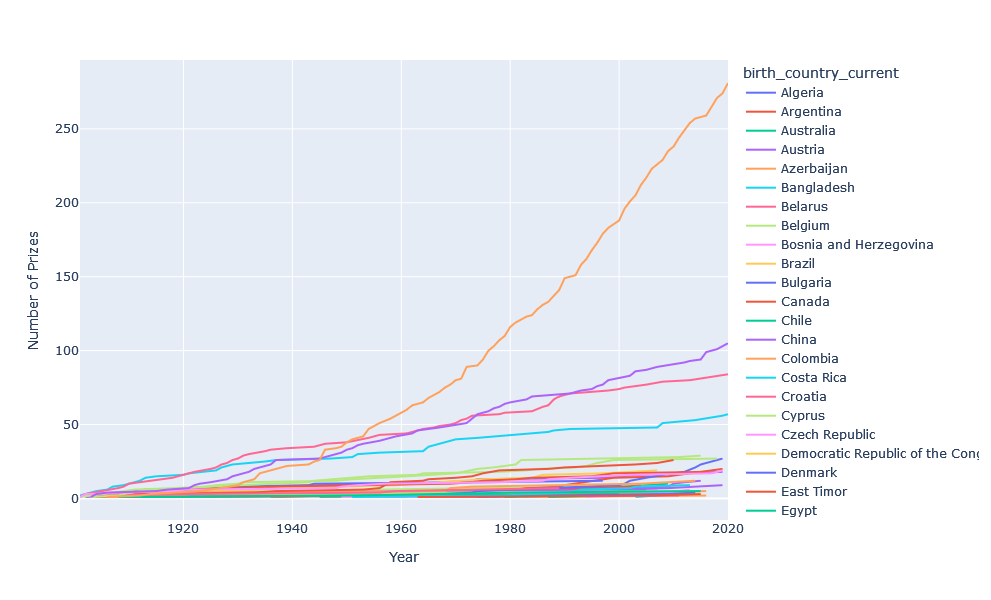

In [684]:
l_char = px.line(
    cumulative_prizes,
    x='year',
    y='prize',
    color='birth_country_current',
    hover_name='birth_country_current',
    height=600,
    width=1000
)
l_char.update_layout(
    xaxis_title = 'Year',
    yaxis_title = 'Number of Prizes'
)

## Summary

### General Insights

- Total Prizes Awarded: 962 prizes across six categories: Chemistry, Economics, Literature, Medicine, Peace, and Physics.

Prize Categories:
- Most Awards: Medicine (222 prizes, 23% of total).
- Fewest Awards: Economics (86 prizes, 9% of total).

Individuals vs Organizations:
- 934 prizes (97%) were awarded to individuals.
- 28 prizes (3%) were awarded to organizations.

Gender Distribution:
- Male Winners: 876 (94% of individual awards).
- Female Winners: 58 (6% of individual awards).
- Females were better represented in Medicine, Literature, and Peace categories.

### Key Observations

- Duplicate Entries: No true duplicates based on full names; recurring entries indicate multiple prize wins.
- Missing Data: Missing values in birth dates are attributed to organizational winners, while missing organization names imply unaffiliated individual winners.

### Historical Insights

First Female Laureates:
- Marie Curie (Physics, 1903).
- Baroness Bertha von Suttner (Peace, 1905).
- Selma Lagerlöf (Literature, 1909).

First Male Laureates:
- Jacobus van 't Hoff (Chemistry, 1901).
- Sully Prudhomme (Literature, 1901).
- Emil von Behring (Medicine, 1901).

Multiple Winners:
- Four individuals, including Marie Curie and Linus Pauling, won prizes more than once.
- 100 organizations have won multiple prizes.

### Trends and Patterns

Country Distribution:
- USA leads with 281 individual laureates, followed by the UK (91) and Germany (65).

Prize Sharing: All 962 prizes had instances of being shared among recipients.

Temporal Trends:
- An upward trend in prize frequency, particularly after the addition of the Economics category in 1969.
- Decreased awards during World War I and II.

### Exploratory Questions Answered

- Common and Rare Prizes: Medicine is the most awarded category; Economics is the least.
- Gender Split: Clear male dominance, though females feature prominently in specific categories.
- Prize Distribution by Type: Majority awarded to individuals, with a small proportion for organizations.
- Recent Trends: Increasing number of shared prizes and overall awards over time.